# PES_1D-Discriminator

In [48]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from pes_1D.data_generator import generate_discriminator_training_set  # type: ignore
from pes_1D.discriminator import NaiveDiscriminator  # type: ignore
from pes_1D.training import test_model, train_model  # type: ignore
from pes_1D.utils import get_model_failure_info  # type: ignore

### parameters

In [59]:
in_features = 64
n_samples = 2000
test_split = 0.5
gpu = True

### Generate training and test sets 

In [55]:
X_train, y_train, X_test, y_test, df_samples = generate_discriminator_training_set(
    n_samples, in_features, test_split, gpu
)

### Discriminator model definition

In [56]:
model = NaiveDiscriminator(in_features, 512, 128, 64, 2)
model = model.to("cuda" if gpu else "cpu")


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Train the model

Training the model...
Training Losses:0.07292564958333969


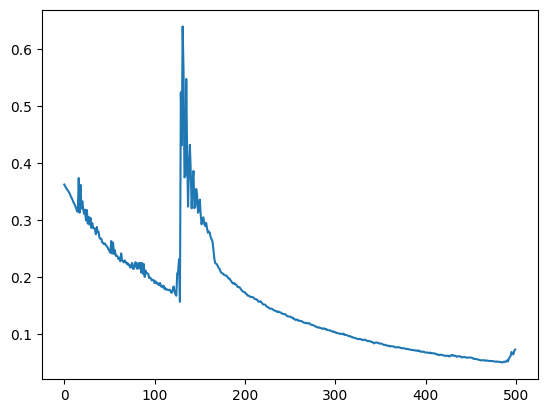

Evaluation:
Test Loss: 0.07313679158687592
Accuracy (%):  98.18


In [58]:
epochs = 500

# Train the model
print("Training the model...")
losses = train_model(X_train, y_train, model, criterion, optimizer, epochs)

print(f"Training Losses:{losses[-1]}")
plt.plot(range(epochs), losses)
plt.show()

# Test the model
test_loss, accuracy = test_model(X_test, y_test, model, criterion)

### Get model failure information

Confusion Matrix:  Confusion Matrix
[[486  10]
 [  0 504]]


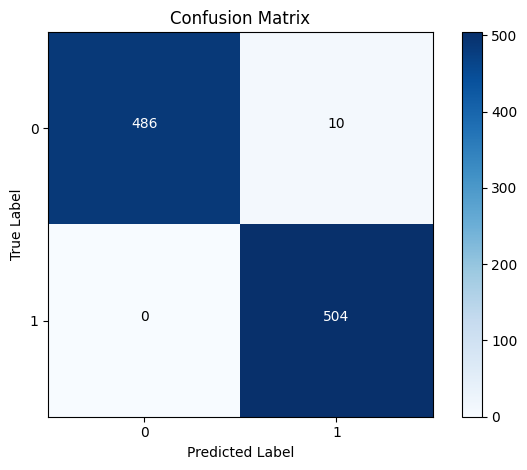



Failure Distribution by Deformation Type:
deformation_type
oscilation    9
outliers      1
Name: count, dtype: int64




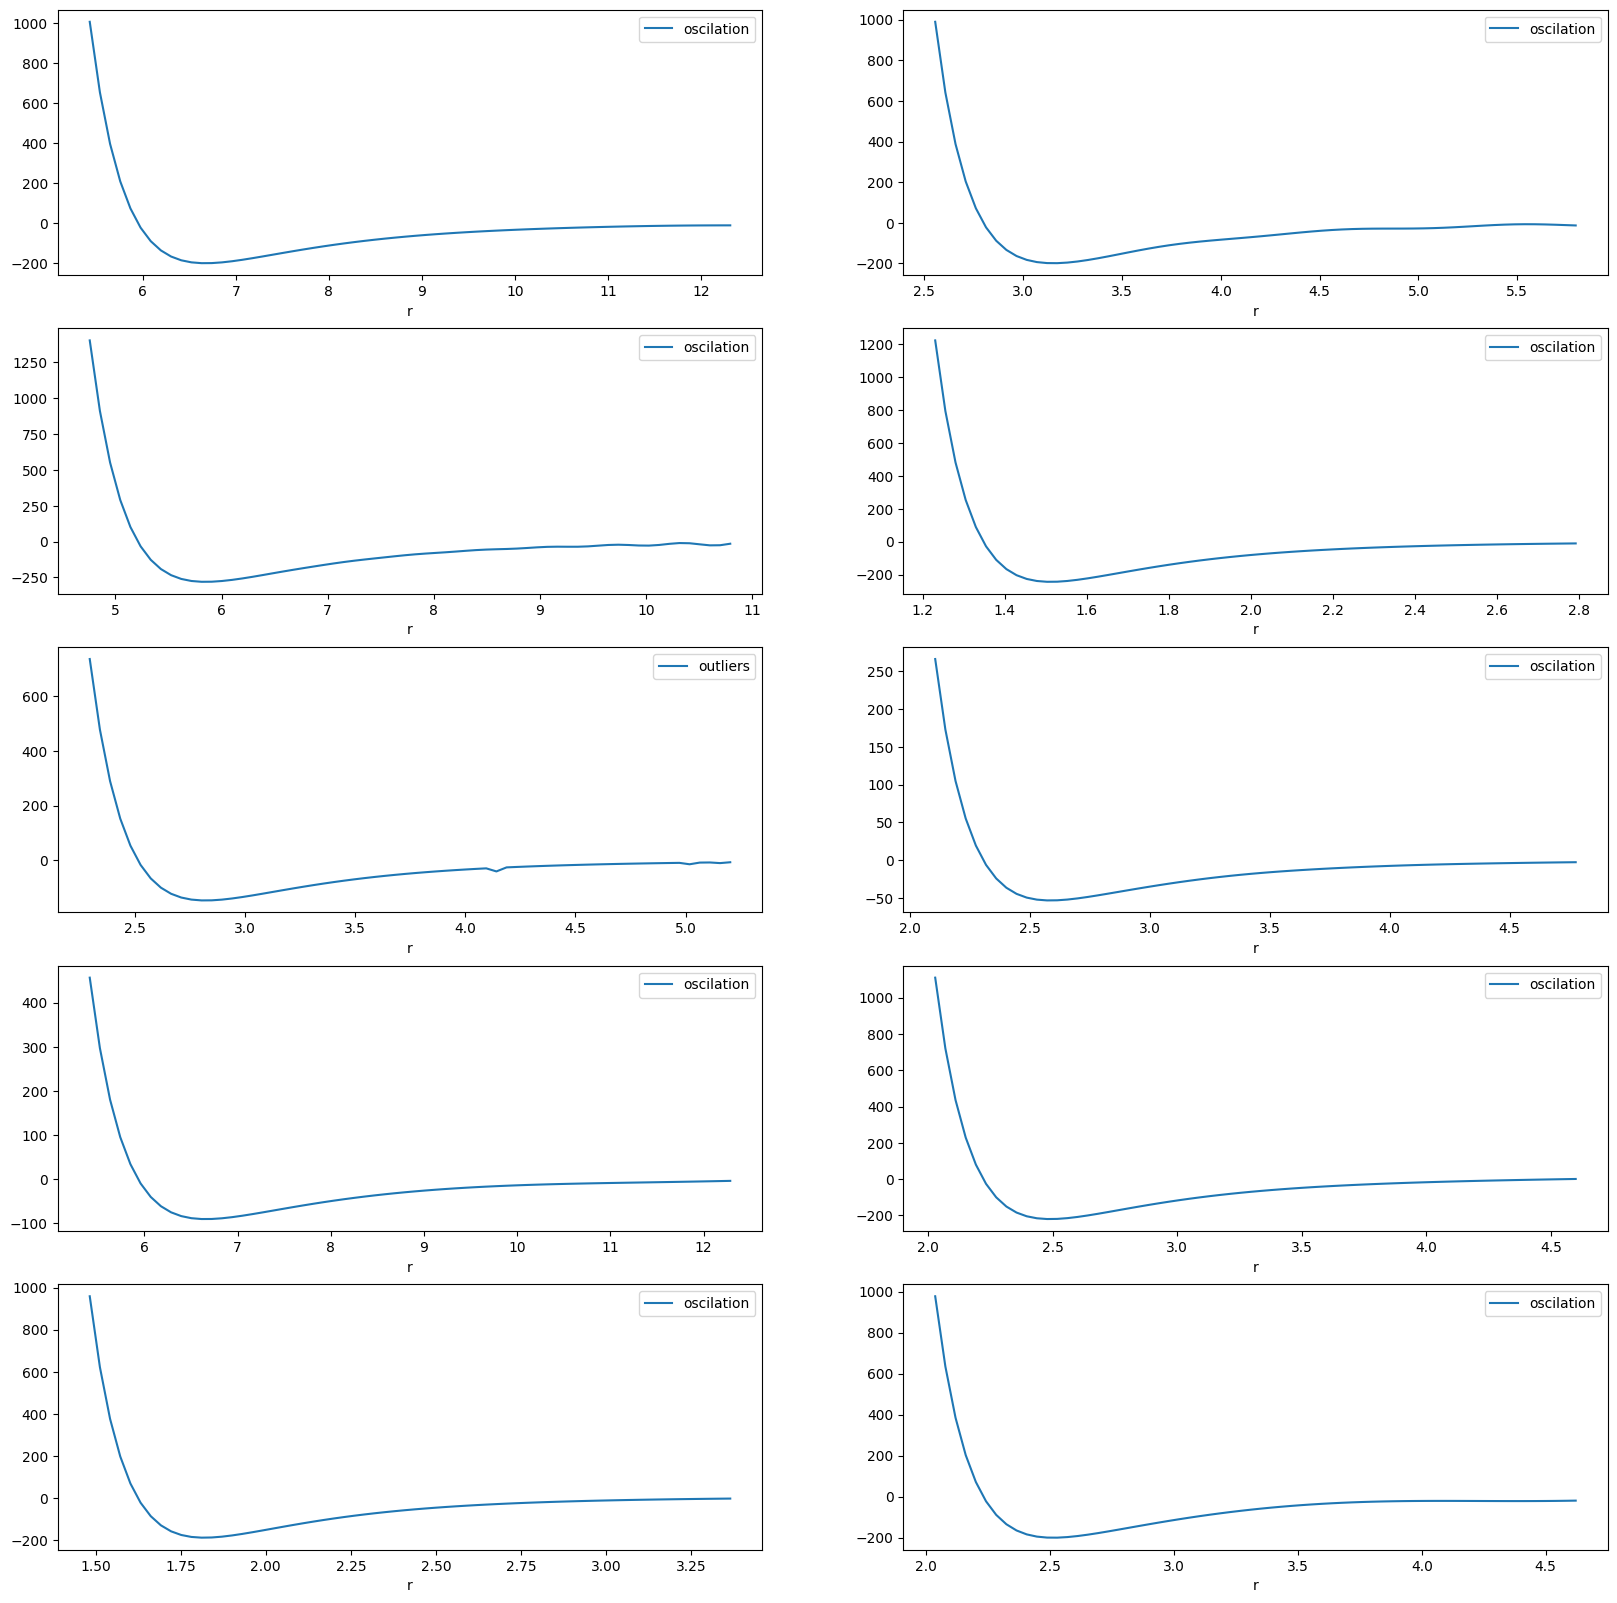

In [53]:
df_train = df_samples[df_samples.index < n_samples - int(n_samples * test_split)]
df_test = df_samples[df_samples.index >= n_samples - int(n_samples * test_split)]


get_model_failure_info(df_test, X_test, y_test, model)